In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation 
import matplotlib.animation as animation
import sys 

# We need to solve this once and for all
sys.path.append('/Users/sdea/Coding/pyCASINO/src')

from functions import *

In [15]:
# Parameters for silicon 
E_beam = 30     # keV 
Z = 14          # Silicon 
A = 28.0855     # Atomic weight (g/mol) 
rho = 2.33      # Density (g/cm3)

# Parameters for the simulation
# The simulation consists on a bulk material, with no inclination respect to the electron beam 
x = 0
y = 0
theta = 0
N_electrons = 1000
max_events = 1000

# The storing lists 
x_list_final = [] 
y_list_final = []
bse_list = []

for n_el in range(0, 1000):
    
    # Reset parameters 
    E = E_beam; 
    x = 0
    y = 0
    theta = 0
    x_list = []
    y_list = []
    is_backscattered = False
    print(f'Working on electron: {n_el}')
    
    # Part related to the single electrode
    for i in range(0, max_events):
        
        alpha = compute_alpha(E, Z);
        sigma = compute_sigma(E, Z, alpha);
        lambda_mean = compute_lambda(A, rho, sigma);
        step = compute_step(lambda_mean);

        theta_new = compute_scatt_angle(alpha);

        # Get the random on the sign
        rand_sign = 2 * np.random.randint(0, 2) - 1
        theta_new = theta_new * rand_sign;

        theta = theta + theta_new;

        # Update the new trajectory
        x = x + step * np.cos(theta);
        y = y + step * np.sin(theta);
        
        # We check if the electron leaves the material
        if (x <= 0):
            is_backscattered = True
            break
        else:
            is_backscattered = False
        
        if (E < 0.2):
            break
        else:
            x_list.append(x)
            y_list.append(y)
        
    # The main loop
    bse_list.append(is_backscattered)
    x_list_final.append(x_list)
    y_list_final.append(y_list)


Working on electron: 0
Working on electron: 1
Working on electron: 2
Working on electron: 3
Working on electron: 4
Working on electron: 5
Working on electron: 6
Working on electron: 7
Working on electron: 8
Working on electron: 9
Working on electron: 10
Working on electron: 11
Working on electron: 12
Working on electron: 13
Working on electron: 14
Working on electron: 15
Working on electron: 16
Working on electron: 17
Working on electron: 18
Working on electron: 19
Working on electron: 20
Working on electron: 21
Working on electron: 22
Working on electron: 23
Working on electron: 24
Working on electron: 25
Working on electron: 26
Working on electron: 27
Working on electron: 28
Working on electron: 29
Working on electron: 30
Working on electron: 31
Working on electron: 32
Working on electron: 33
Working on electron: 34
Working on electron: 35
Working on electron: 36
Working on electron: 37
Working on electron: 38
Working on electron: 39
Working on electron: 40
Working on electron: 41
Wo

Working on electron: 336
Working on electron: 337
Working on electron: 338
Working on electron: 339
Working on electron: 340
Working on electron: 341
Working on electron: 342
Working on electron: 343
Working on electron: 344
Working on electron: 345
Working on electron: 346
Working on electron: 347
Working on electron: 348
Working on electron: 349
Working on electron: 350
Working on electron: 351
Working on electron: 352
Working on electron: 353
Working on electron: 354
Working on electron: 355
Working on electron: 356
Working on electron: 357
Working on electron: 358
Working on electron: 359
Working on electron: 360
Working on electron: 361
Working on electron: 362
Working on electron: 363
Working on electron: 364
Working on electron: 365
Working on electron: 366
Working on electron: 367
Working on electron: 368
Working on electron: 369
Working on electron: 370
Working on electron: 371
Working on electron: 372
Working on electron: 373
Working on electron: 374
Working on electron: 375


Working on electron: 663
Working on electron: 664
Working on electron: 665
Working on electron: 666
Working on electron: 667
Working on electron: 668
Working on electron: 669
Working on electron: 670
Working on electron: 671
Working on electron: 672
Working on electron: 673
Working on electron: 674
Working on electron: 675
Working on electron: 676
Working on electron: 677
Working on electron: 678
Working on electron: 679
Working on electron: 680
Working on electron: 681
Working on electron: 682
Working on electron: 683
Working on electron: 684
Working on electron: 685
Working on electron: 686
Working on electron: 687
Working on electron: 688
Working on electron: 689
Working on electron: 690
Working on electron: 691
Working on electron: 692
Working on electron: 693
Working on electron: 694
Working on electron: 695
Working on electron: 696
Working on electron: 697
Working on electron: 698
Working on electron: 699
Working on electron: 700
Working on electron: 701
Working on electron: 702


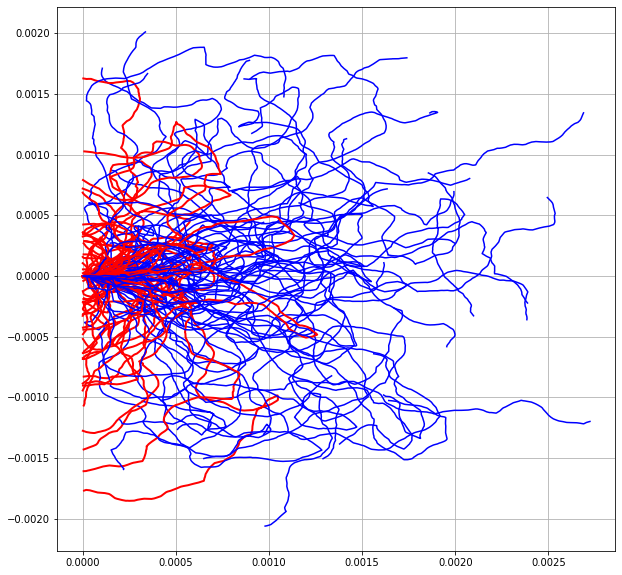

In [16]:
# Plot the results 
plt.figure(figsize=(10,10))
for n_el in np.arange(1, N_electrons, 10):
    if bse_list[n_el] is True:
        plt.plot(x_list_final[n_el], y_list_final[n_el], 'r-', linewidth=2.0)
    else:
        plt.plot(x_list_final[n_el], y_list_final[n_el], 'b-', linewidth=1.5)

plt.grid(True)


In [10]:
np.arange(1, n_el, 10)

array([], dtype=int64)

In [11]:
n_el

0